# FINAL PROJECT

In [1]:
# Your code here
!kaggle competitions download -c DontGetKicked

DontGetKicked.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Open the zip file
import zipfile
zip_path = '/workspaces/Isabell-Joane-Eric-Final-Project/src/DontGetKicked.zip'
extract_to = '/workspaces/Isabell-Joane-Eric-Final-Project/data/processed'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents into the directory
    zip_ref.extractall(extract_to)

In [3]:
import pandas as pd

total_data = pd.read_csv('/workspaces/Isabell-Joane-Eric-Final-Project/data/processed/training.csv')

total_data.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


# Data Cleaning ________________________________________________

## 1.1 Check for Nas

Plan:
- remove columns with NAs succeeding a total of 50%
- delete all NAs in other columns
- explore NAs as zeros and delete if resonable


In [4]:
# Check for missing values (NAs)
missing_values = total_data.isna().sum()  # Count the number of missing values in each column
total_missing = missing_values.sum()  # Total number of missing values in the dataset

# Calculate percentage of missing values per column
missing_percentage = (total_data.isna().mean() * 100).round(2)  # Calculate percentage of missing values
missing_percentage = missing_percentage.sort_values(ascending=False)  # Sort in descending order

# Display missing values percentage per column
print("Percentage of missing values per column (descending order):")
print(missing_percentage)
print(total_missing)

Percentage of missing values per column (descending order):
AUCGUART                             95.32
PRIMEUNIT                            95.32
WheelType                             4.35
WheelTypeID                           4.34
Trim                                  3.23
MMRCurrentRetailCleanPrice            0.43
MMRCurrentAuctionAveragePrice         0.43
MMRCurrentAuctionCleanPrice           0.43
MMRCurrentRetailAveragePrice          0.43
MMRAcquisitonRetailCleanPrice         0.02
MMRAcquisitionAuctionCleanPrice       0.02
MMRAcquisitionAuctionAveragePrice     0.02
MMRAcquisitionRetailAveragePrice      0.02
Size                                  0.01
Nationality                           0.01
Transmission                          0.01
Color                                 0.01
SubModel                              0.01
TopThreeAmericanName                  0.01
RefId                                 0.00
IsBadBuy                              0.00
PurchDate                            

In [5]:
# Remove columns "AUCGUART" and "PRIMEUNIT"
columns_to_remove = ["AUCGUART", "PRIMEUNIT"]
total_data = total_data.drop(columns_to_remove, axis=1)

- PRIMEUNIT: Identifies if the vehicle would have a higher demand than a standard purchase
- AUCGUART: The level guarntee provided by auction for the vehicle
- NOTE: as these are all metrics or recommendations provided as rather biased advice from the auction administrators they are not vital to our exploration and hold an NA count of over 90%

### 1.2 Remove Nas

In [6]:
# Remove rows with missing values
total_data = total_data.dropna()
total_data.shape

(67270, 32)

### 1.3 Nas as Zeros

In [7]:
# zeros as NAs
zero_counts = (total_data == 0).sum()
zero_columns = zero_counts[zero_counts > 0]
# Display zero counts per column
print("Number of zeros in each column:")
print(zero_columns.sort_values(ascending=False))

Number of zeros in each column:
IsOnlineSale                         65586
IsBadBuy                             60837
MMRAcquisitionAuctionAveragePrice      772
MMRAcquisitonRetailCleanPrice          772
MMRAcquisitionRetailAveragePrice       772
MMRAcquisitionAuctionCleanPrice        649
MMRCurrentAuctionAveragePrice          473
MMRCurrentRetailCleanPrice             473
MMRCurrentRetailAveragePrice           473
MMRCurrentAuctionCleanPrice            355
VehicleAge                               2
dtype: int64


Removing applicable zeros

In [8]:
# List of columns with zeros
columns_with_zeros = [
    "MMRAcquisitionRetailAveragePrice",
    "MMRAcquisitionAuctionAveragePrice",
    "MMRAcquisitonRetailCleanPrice",
    "MMRAcquisitionAuctionCleanPrice",
    "MMRCurrentAuctionAveragePrice",
    "MMRCurrentRetailAveragePrice",
    "MMRCurrentRetailCleanPrice",
    "MMRCurrentAuctionCleanPrice"
]

# Remove rows with zeros in specified columns
total_data = total_data[(total_data[columns_with_zeros] != 0).all(axis=1)]

print(total_data.shape)

(66453, 32)


## 2.1 Checking for Duplicates

In [9]:
# Duplicate Rows
# Check for duplicate rows
duplicate_rows = total_data[total_data.duplicated()]
# Display duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [RefId, IsBadBuy, PurchDate, Auction, VehYear, VehicleAge, Make, Model, Trim, SubModel, Color, Transmission, WheelTypeID, WheelType, VehOdo, Nationality, Size, TopThreeAmericanName, MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice, MMRAcquisitonRetailCleanPrice, MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice, BYRNO, VNZIP1, VNST, VehBCost, IsOnlineSale, WarrantyCost]
Index: []

[0 rows x 32 columns]


## 3.1 Checking for Outliers

In [10]:
total_data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000,66453.000000
mean,36339.701789,0.095466,2005.353363,4.168646,1.493010,71727.516816,6236.871217,7501.590673,8642.017305,10015.551804,6211.870781,7484.346997,8879.089748,10261.186688,26492.168977,58275.015876,6754.708677,0.025161,1278.488225
std,20938.534106,0.293860,1.728791,1.707810,0.521061,14392.088802,2380.799298,2615.807612,3039.124929,3235.333341,2385.225987,2619.909472,3013.463890,3210.879011,25963.331802,26113.043258,1748.404288,0.156614,577.437882
min,1.000000,0.000000,2001.000000,0.000000,1.000000,5368.000000,889.000000,1240.000000,1543.000000,2009.000000,369.000000,494.000000,899.000000,1034.000000,835.000000,2764.000000,1400.000000,0.000000,462.000000
25%,18251.000000,0.000000,2004.000000,3.000000,1.000000,62147.000000,4383.000000,5537.000000,6395.000000,7607.000000,4345.000000,5510.000000,6603.000000,7865.000000,17212.000000,32124.000000,5470.000000,0.000000,853.000000
50%,36368.000000,0.000000,2005.000000,4.000000,1.000000,73522.000000,6212.000000,7423.000000,8551.000000,9922.000000,6155.000000,7415.000000,8842.000000,10206.000000,19662.000000,74135.000000,6750.000000,0.000000,1169.000000
75%,54230.000000,0.000000,2007.000000,5.000000,2.000000,82522.000000,7824.000000,9075.000000,10725.000000,12186.000000,7783.000000,9072.000000,10993.000000,12387.000000,22808.000000,80022.000000,7915.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,40308.000000,35722.000000,36859.000000,39080.000000,40308.000000,99761.000000,99224.000000,35900.000000,1.000000,7498.000000


Outlier count in relevant numeric columns 3 STDs away

In [11]:
from scipy.stats import zscore
# Columns to exclude
exclude_columns = ['IsBadBuy', 'VehOdo', 'VehBCost', 'IsOnlineSale']

# Filter numeric columns excluding the specified columns
numeric_columns = total_data.select_dtypes(include=['number']).drop(columns=exclude_columns)

# Calculate z-scores for numeric columns
z_scores = numeric_columns.apply(zscore)

# Identify outliers using z-scores (threshold = 3)
outliers = (z_scores.abs() > 3)

# Count outliers in each column
outliers_count = outliers.sum()

# Display the number of outliers in each column
print("Number of outliers in each numeric column:")
print(outliers_count)

Number of outliers in each numeric column:
RefId                                  0
VehYear                                0
VehicleAge                             0
WheelTypeID                            0
MMRAcquisitionAuctionAveragePrice    358
MMRAcquisitionAuctionCleanPrice      394
MMRAcquisitionRetailAveragePrice     202
MMRAcquisitonRetailCleanPrice        243
MMRCurrentAuctionAveragePrice        362
MMRCurrentAuctionCleanPrice          404
MMRCurrentRetailAveragePrice         190
MMRCurrentRetailCleanPrice           247
BYRNO                                  0
VNZIP1                                 0
WarrantyCost                         543
dtype: int64


Note: given the values dont succeed unreasonable prices (~30k mark), and most analysed columns have a predicted normal distribution (given their metrics), we will keep the 'outlying' prices as they make for a more robust data set

# Exploratory Data Analysis (EDA) _______________________________

TARGET: IsBadBuy Identifies if the kicked vehicle was an avoidable purchase

In [12]:
# Get data types of each column
data_types = total_data.dtypes

# Display data types and shape
print("Data types of each column:")
print(data_types)


Data types of each column:
RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPric

In [13]:
# Get shape of the DataFrame
data_shape = total_data.shape

# Count occurrences of each data type
data_type_counts = data_types.value_counts()

# Display count of each data type
print("Count of each data type:")
print(data_type_counts)
print("\nShape of the DataFrame:")
print(data_shape)

Count of each data type:
object     13
float64    10
int64       9
Name: count, dtype: int64

Shape of the DataFrame:
(66453, 32)


In [14]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66453 entries, 0 to 72982
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              66453 non-null  int64  
 1   IsBadBuy                           66453 non-null  int64  
 2   PurchDate                          66453 non-null  object 
 3   Auction                            66453 non-null  object 
 4   VehYear                            66453 non-null  int64  
 5   VehicleAge                         66453 non-null  int64  
 6   Make                               66453 non-null  object 
 7   Model                              66453 non-null  object 
 8   Trim                               66453 non-null  object 
 9   SubModel                           66453 non-null  object 
 10  Color                              66453 non-null  object 
 11  Transmission                       66453 non-null  object 


In [15]:
total_data.nunique()

RefId                                66453
IsBadBuy                                 2
PurchDate                              515
Auction                                  3
VehYear                                 10
VehicleAge                              10
Make                                    32
Model                                  948
Trim                                   132
SubModel                               798
Color                                   16
Transmission                             3
WheelTypeID                              3
WheelType                                3
VehOdo                               37819
Nationality                              4
Size                                    12
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice    10195
MMRAcquisitionAuctionCleanPrice      11211
MMRAcquisitionRetailAveragePrice     12528
MMRAcquisitonRetailCleanPrice        13249
MMRCurrentAuctionAveragePrice        10167
MMRCurrentA

In [16]:
# Convert PurchDate to datetime
total_data['PurchDate'] = pd.to_datetime(total_data['PurchDate'])

In [17]:
# Convert WheelTypeID to 'category'
total_data['WheelTypeID'] = total_data['WheelTypeID'].astype('category')

## 1.1 Categorical Univariate Variables 

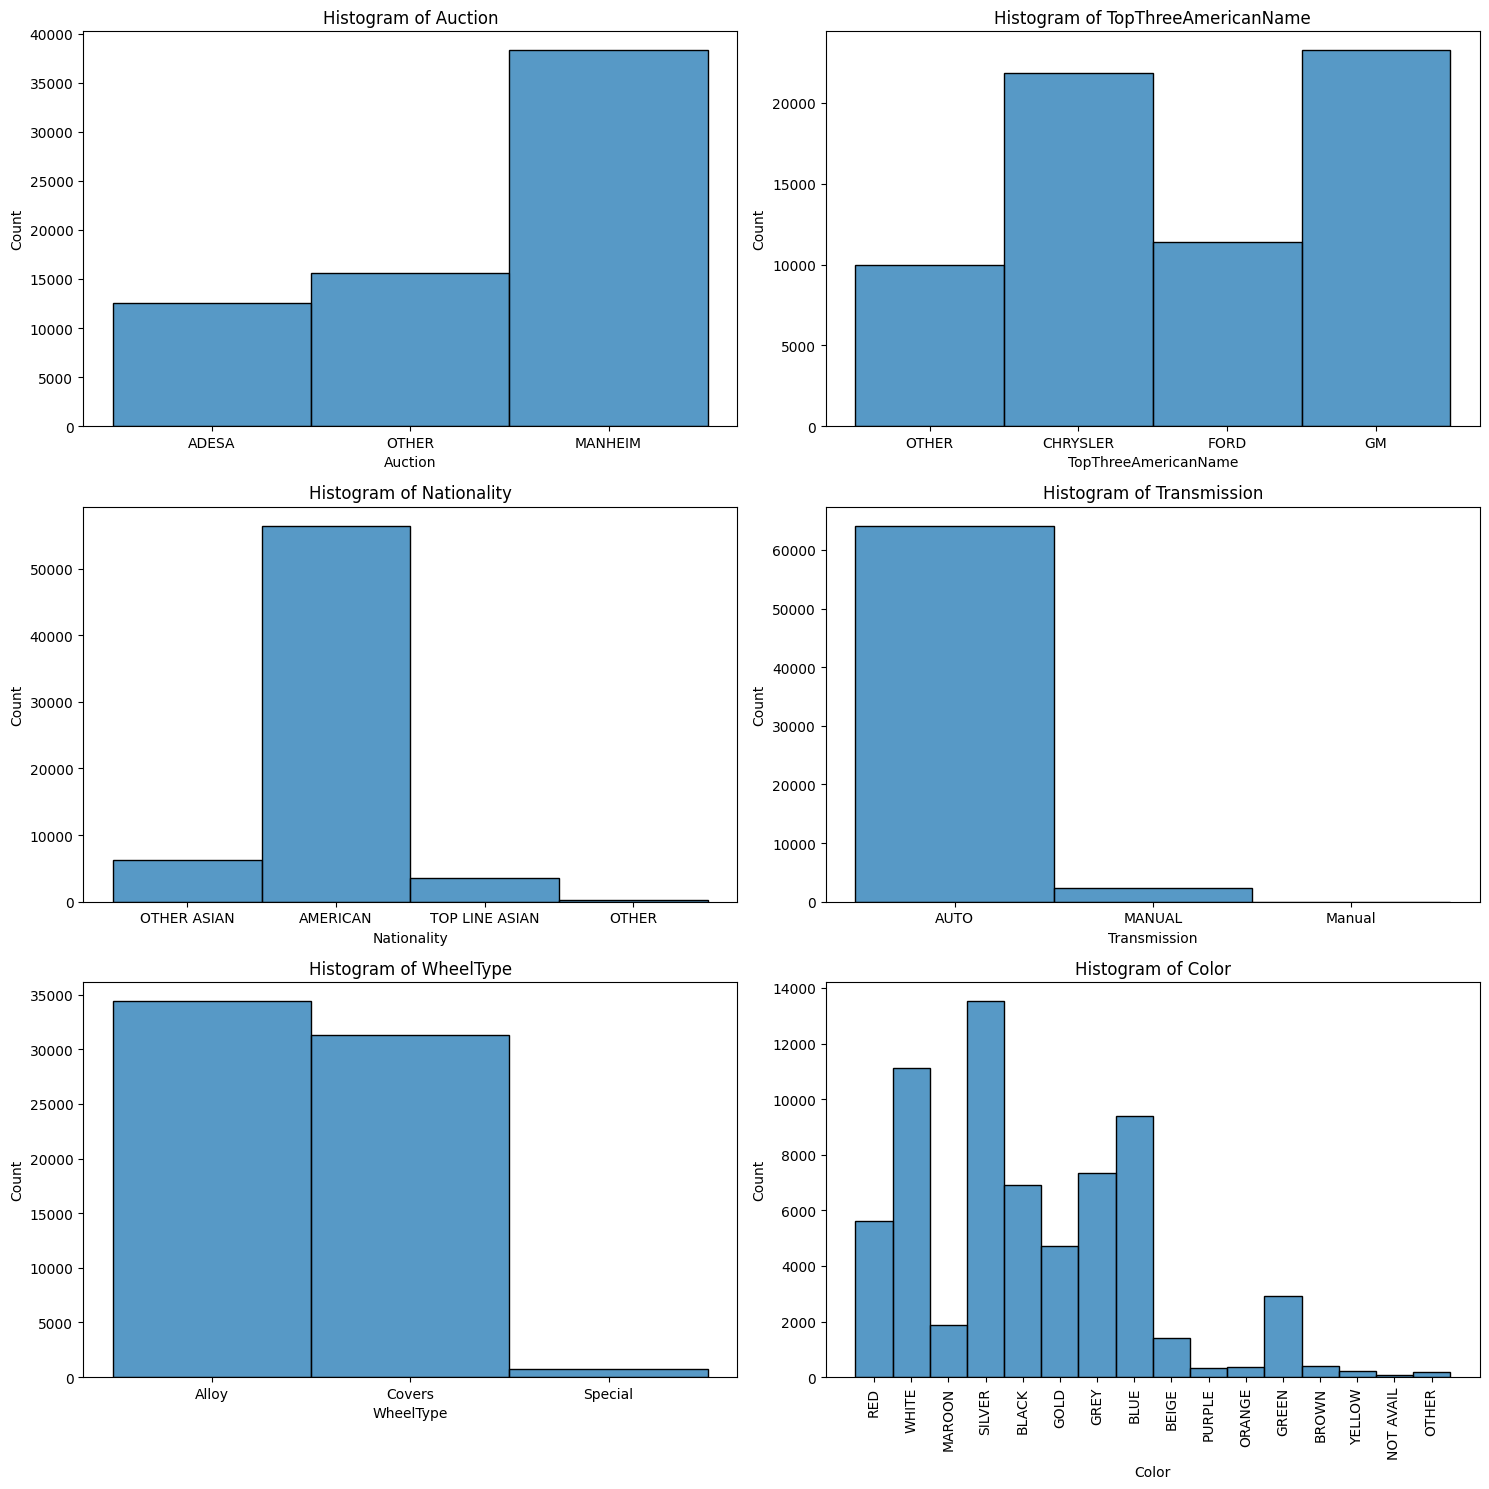

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical features
categorical_features = [
    'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 
    'Transmission', 'WheelType', 'Nationality', 'Size', 
    'TopThreeAmericanName', 'VNST'
]

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis objects with a 3x2 grid layout
fig, axis = plt.subplots(3, 2, figsize=(15, 15))

# Plot histograms for each specified categorical feature
sns.histplot(ax=axis[0, 0], data=total_data, x='Auction')
axis[0, 0].set_title('Histogram of Auction')
axis[0, 0].set_xlabel('Auction')
axis[0, 0].set_ylabel('Count')

sns.histplot(ax=axis[0, 1], data=total_data, x='TopThreeAmericanName')
axis[0, 1].set_title('Histogram of TopThreeAmericanName')
axis[0, 1].set_xlabel('TopThreeAmericanName')
axis[0, 1].set_ylabel('Count')

sns.histplot(ax=axis[1, 0], data=total_data, x='Nationality')
axis[1, 0].set_title('Histogram of Nationality')
axis[1, 0].set_xlabel('Nationality')
axis[1, 0].set_ylabel('Count')

sns.histplot(ax=axis[1, 1], data=total_data, x='Transmission')
axis[1, 1].set_title('Histogram of Transmission')
axis[1, 1].set_xlabel('Transmission')
axis[1, 1].set_ylabel('Count')

sns.histplot(ax=axis[2, 0], data=total_data, x='WheelType')
axis[2, 0].set_title('Histogram of WheelType')
axis[2, 0].set_xlabel('WheelType')
axis[2, 0].set_ylabel('Count')

sns.histplot(ax=axis[2, 1], data=total_data, x='Color')
axis[2, 1].set_title('Histogram of Color')
axis[2, 1].set_xlabel('Color')
axis[2, 1].set_ylabel('Count')
axis[2, 1].tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



/tmp/ipykernel_854/3516571225.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x=make_counts.index, y=make_counts, palette='viridis')


/tmp/ipykernel_854/3516571225.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x=size_counts.index, y=size_counts, palette='viridis')
/tmp/ipykernel_854/3516571225.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x=trim_counts.index, y=trim_counts, palette='viridis')
/tmp/ipykernel_854/3516571225.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 1], x=vnst_counts.index, y=vnst_counts, palette='viridis')


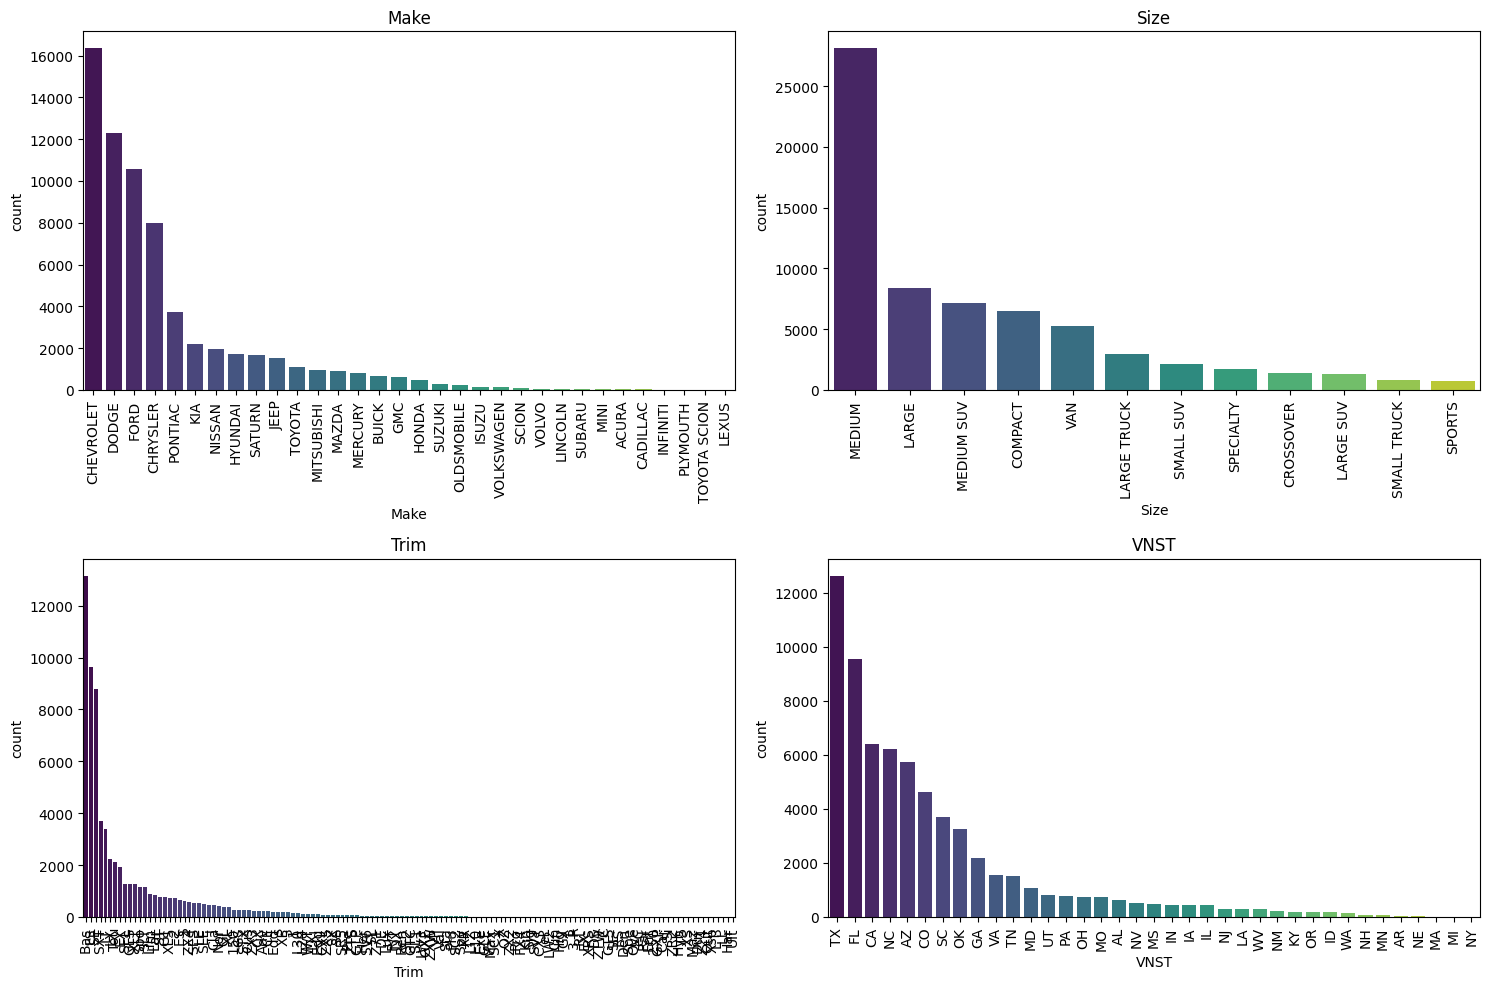

In [19]:
# Define the remaining categorical features
remaining_categorical_features = ['Make', 'Model', 'Trim', 'SubModel', 'Size', 'VNST']

# Get counts for each category
make_counts = total_data['Make'].value_counts().sort_values(ascending=False)
size_counts = total_data['Size'].value_counts().sort_values(ascending=False)
trim_counts = total_data['Trim'].value_counts().sort_values(ascending=False)
vnst_counts = total_data['VNST'].value_counts().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'Make'
sns.barplot(ax=axes[0, 0], x=make_counts.index, y=make_counts, palette='viridis')
axes[0, 0].set_title('Make')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot for 'Size'
sns.barplot(ax=axes[0, 1], x=size_counts.index, y=size_counts, palette='viridis')
axes[0, 1].set_title('Size')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot for 'Trim'
sns.barplot(ax=axes[1, 0], x=trim_counts.index, y=trim_counts, palette='viridis')
axes[1, 0].set_title('Trim')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot for 'VNST'
sns.barplot(ax=axes[1, 1], x=vnst_counts.index, y=vnst_counts, palette='viridis')
axes[1, 1].set_title('VNST')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



## 1.2 Numerical Univariate Analysis

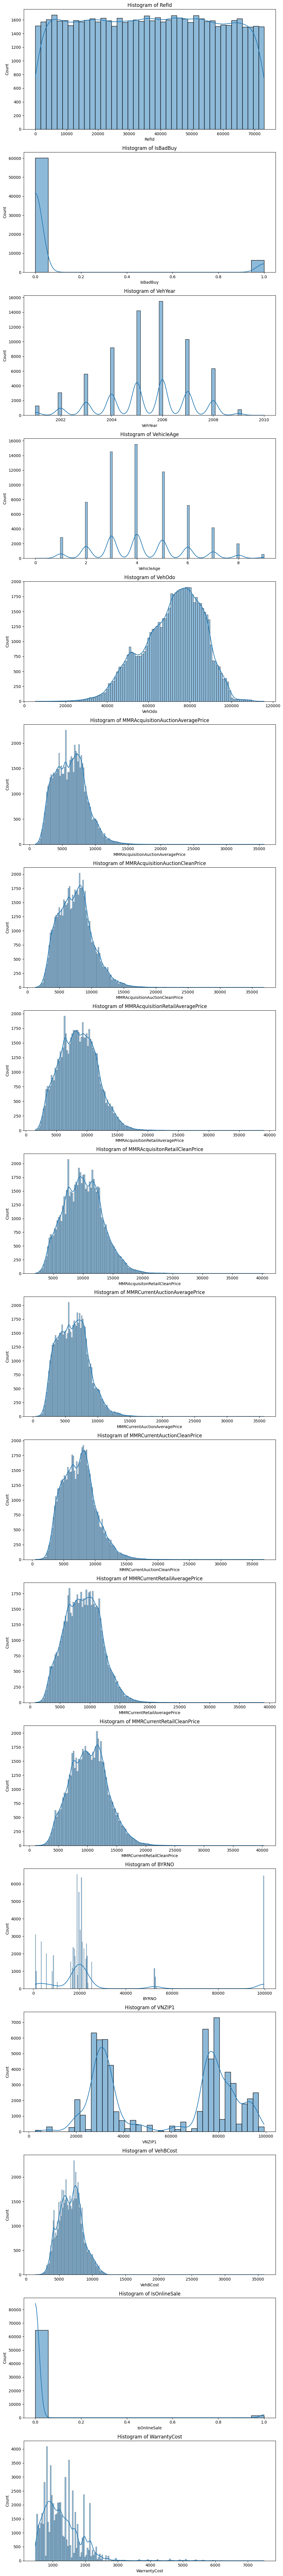

In [20]:
# Select only numeric columns
numeric_columns = total_data.select_dtypes(include=['int64', 'float64'])

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=numeric_columns.shape[1], ncols=1, figsize=(10, 5 * numeric_columns.shape[1]))

# Plot histogram with KDE for each numeric column
for i, column in enumerate(numeric_columns.columns):
    sns.histplot(data=numeric_columns, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## 2.1 Multivaraite Analysis

### 2.2 Numerical - Numerical

Auction avg and above avg condtion prices vs paid price

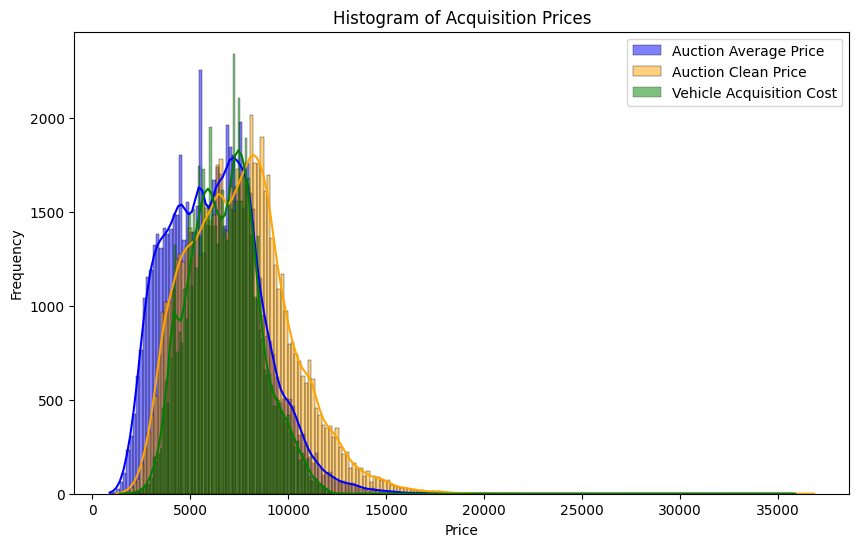

In [23]:
# Create a figure and axis objects
plt.figure(figsize=(10, 6))

# Plot histogram for MMRAcquisitionAuctionAveragePrice
sns.histplot(data=total_data, x='MMRAcquisitionAuctionAveragePrice', color='blue', label='Auction Average Price', kde=True)

# Plot histogram for MMRAcquisitionAuctionCleanPrice
sns.histplot(data=total_data, x='MMRAcquisitionAuctionCleanPrice', color='orange', label='Auction Clean Price', kde=True)

# Plot histogram for VehBCost
sns.histplot(data=total_data, x='VehBCost', color='green', label='Vehicle Acquisition Cost', kde=True)

# Add labels and legend
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Acquisition Prices')
plt.legend()

# Show the plot
plt.show()




Bought above asking vs Lemon Frequency

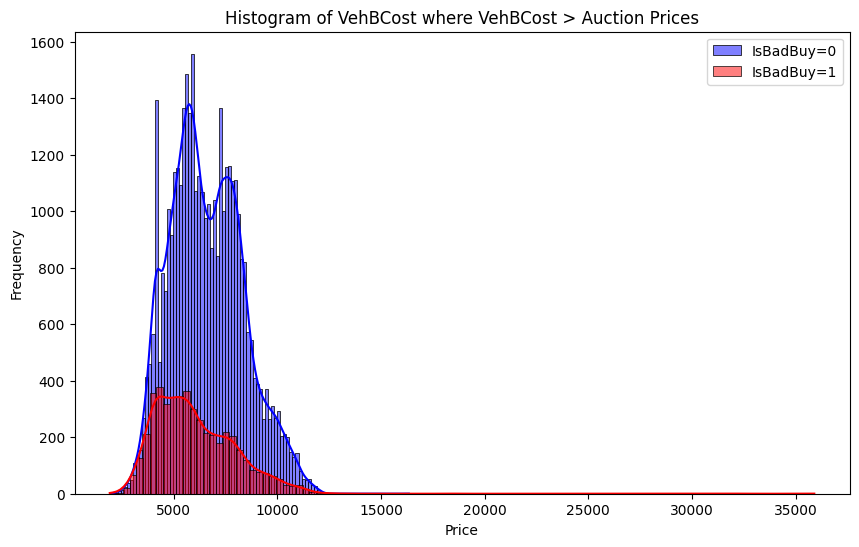

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where VehBCost is more than either of the two acquisition prices
filtered_data = total_data[(total_data['VehBCost'] > total_data['MMRAcquisitionAuctionAveragePrice']) | 
                           (total_data['VehBCost'] > total_data['MMRAcquisitionAuctionCleanPrice'])]

# Create a figure and axis objects
plt.figure(figsize=(10, 6))

# Plot histogram for VehBCost where IsBadBuy is 0
sns.histplot(data=filtered_data[filtered_data['IsBadBuy'] == 0], x='VehBCost', color='blue', label='IsBadBuy=0', kde=True)

# Plot histogram for VehBCost where IsBadBuy is 1
sns.histplot(data=filtered_data[filtered_data['IsBadBuy'] == 1], x='VehBCost', color='red', label='IsBadBuy=1', kde=True)

# Add labels and legend
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of VehBCost where VehBCost > Auction Prices')
plt.legend()

# Show the plot
plt.show()


In [28]:
# Calculate the percentage of IsBadBuy equals 1 in the specific relation
specific_relation_count = filtered_data[filtered_data['IsBadBuy'] == 1]['IsBadBuy'].count()
specific_relation_total = filtered_data['IsBadBuy'].count()
specific_relation_percentage = (specific_relation_count / specific_relation_total) * 100

# Calculate the percentage of IsBadBuy equals 1 in the entire dataset
total_count = total_data[total_data['IsBadBuy'] == 1]['IsBadBuy'].count()
total_total = total_data['IsBadBuy'].count()
total_percentage = (total_count / total_total) * 100

# Calculate relative increase
relative_increase = ((specific_relation_percentage / total_percentage) - 1) * 100

# Print the result
# Compare the two percentages
print("Percentage of lemons in the specific relation: {:.2f}%".format(specific_relation_percentage))
print("Percentage of lemons in the entire dataset: {:.2f}%".format(total_percentage))
print("Relative Increase:", round(relative_increase, 2), "%")


Percentage of lemons in the specific relation: 10.96%
Percentage of lemons in the entire dataset: 9.55%
Relative Increase: 14.78 %
